In [15]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import cv2
import imghdr
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model


2024-02-01 12:04:26.722840: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [116]:
class Trainer:
    def __init__(self, data_set):
        self.data_set = data_set
        self.train = 0
        self.val = 0
        self.test = 0
        self.model = Sequential()
        self.history = 0
    
    def group_data(self, training, validation, testing):
        train_size = int(len(self.data_set)*.7)
        val_size = int(len(self.data_set)*.2)
        test_size = int(len(self.data_set)*.1)
        
        self.train = data.take(train_size)
        self.val = data.skip(train_size).take(val_size)
        self.test = data.skip(train_size+val_size).take(test_size)
        
    def build_neural_network_layers(self):
        self.model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
        self.model.add(MaxPooling2D())
        self.model.add(Conv2D(32, (3,3), 1, activation='relu'))
        self.model.add(MaxPooling2D())
        self.model.add(Conv2D(16, (3,3), 1, activation='relu'))
        self.model.add(MaxPooling2D())
        self.model.add(Flatten())
        self.model.add(Dense(256, activation='relu'))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

    def start(self, epoch):
        self.history = self.model.fit(self.train, epochs=epoch, validation_data=self.val)
    def save(self, path):
        self.modelsmodel.save(os.path.join('models','imageclassifier.h5'))
        new_model = load_model('imageclassifier.h5')
        
    def plot_history(self):
        # plot loss
        fig = plt.figure()
        plt.plot(self.history.history['loss'], color='teal', label='loss')
        plt.plot(self.history.history['val_loss'], color='orange', label='val_loss')
        fig.suptitle('Loss', fontsize=20)
        plt.legend(loc="upper left")
        plt.show()
        # plot accuracy
        fig = plt.figure()
        plt.plot(self.history.history['accuracy'], color='teal', label='accuracy')
        plt.plot(self.history.history['val_accuracy'], color='orange', label='val_accuracy')
        fig.suptitle('Accuracy', fontsize=20)
        plt.legend(loc="upper left")
        plt.show()
        
    def testing(self):
        pre = Precision()
        re = Recall()
        acc = BinaryAccuracy()
        for batch in self.test.as_numpy_iterator(): 
            X, y = batch
            yhat = self.model.predict(X)
            pre.update_state(y, yhat)
            re.update_state(y, yhat)
            acc.update_state(y, yhat)
        print(pre.result(), re.result(), acc.result())
   


In [117]:
def main():
    print("This is the main function")
    x=0


In [118]:
data = tf.keras.utils.image_dataset_from_directory('images')
data_set = data.as_numpy_iterator()
data = data.map(lambda x,y: (x/255, y))

Found 1915 files belonging to 2 classes.


In [119]:
trainer = Trainer(data)

In [120]:
trainer.group_data(7, 2, 1)

In [121]:
trainer.build_neural_network_layers()

In [100]:
trainer.start(2)

Epoch 1/2
42/42 [==============================] - 25s 565ms/step - loss: 0.1931 - accuracy: 0.8906 - val_loss: 0.1080 - val_accuracy: 0.9896
Epoch 2/2
42/42 [==============================] - 24s 558ms/step - loss: 0.1175 - accuracy: 0.9754 - val_loss: 0.0114 - val_accuracy: 1.0000


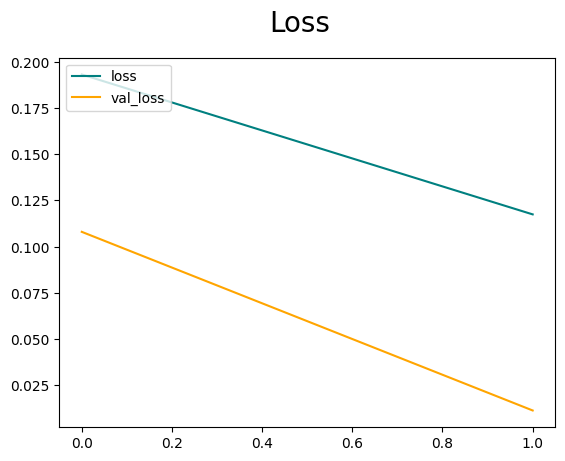

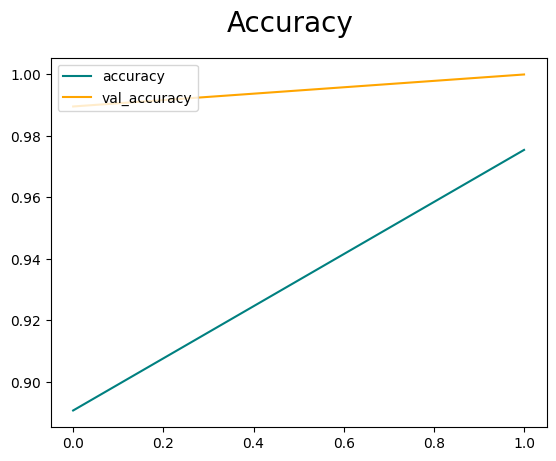

In [101]:
trainer.plot_history()

In [91]:
trainer.history

0

In [122]:
trainer.testing()

1/1 [==============================] - 0s 164ms/step
tf.Tensor(0.122994654, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.122994654, shape=(), dtype=float32)
